In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree

In [17]:
fish2 = pd.read_csv('data/fish2.csv')

#문제집, 정답지 생성
data = fish2.iloc[:,1:].to_numpy()
target = fish2['Species'].to_numpy()

#데이터 분리
train_input,test_input,train_target,test_target = train_test_split(data,target)

model = DecisionTreeClassifier(max_depth=5)  #최대 5층
model.fit(train_input,train_target)
model.score(test_input,test_target)

0.725

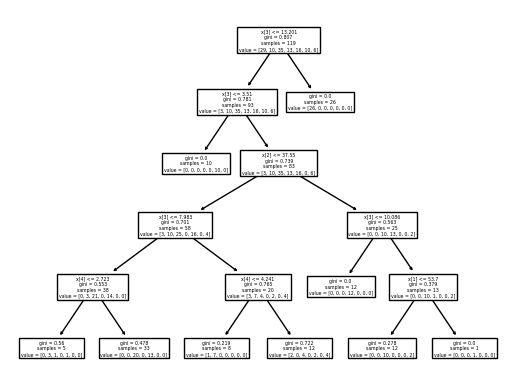

In [18]:
plot_tree(model)
plt.show()

In [19]:
#너무 과하게 학습: 과대적합 // 차이가 너무 크면, 과대적합
#학습이 덜 된 모델: 과소적합 // 훈련 < 시험
print(model.score(train_input,train_target))
print(model.score(test_input,test_target))

0.7815126050420168
0.725


In [72]:
# 결정트리 -> 랜덤포레스트(쉬움), XGBoost(어려움)

# 랜덤포레스트(결정트리 100개) > 결정트리
# 1. 안정적
# 2. 5개의 특성X : 과대적합 잘 안 남
# 3. 데이터 분할X

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

fish2 = pd.read_csv('data/fish2.csv')

data = fish2.iloc[:,1:].to_numpy()
target = fish2['Species'].to_numpy()

rt = RandomForestClassifier(oob_score=True)
rt.fit(data, target)
rt.oob_score_

0.7484276729559748

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression #선형회귀 + 시그모이드 함수(확률)

fish2 = pd.read_csv('data/fish2.csv')

data = fish2.iloc[:,1:].to_numpy()
target = fish2['Species'].to_numpy()

train_input,test_input,train_target,test_target = train_test_split(data,target)

model = LogisticRegression()
model.fit(train_input, train_target)


c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
model.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [31]:
import numpy as np
np.round(model.predict_proba(test_input),3)

array([[0.008, 0.115, 0.403, 0.172, 0.267, 0.   , 0.035],
       [0.083, 0.   , 0.663, 0.025, 0.001, 0.   , 0.228],
       [0.964, 0.002, 0.013, 0.   , 0.002, 0.   , 0.02 ],
       [0.017, 0.159, 0.403, 0.091, 0.294, 0.   , 0.037],
       [0.006, 0.079, 0.559, 0.144, 0.181, 0.   , 0.031],
       [0.011, 0.151, 0.39 , 0.121, 0.294, 0.   , 0.033],
       [0.233, 0.286, 0.11 , 0.013, 0.319, 0.   , 0.039],
       [0.004, 0.058, 0.627, 0.142, 0.138, 0.   , 0.031],
       [0.015, 0.151, 0.34 , 0.123, 0.335, 0.   , 0.035],
       [0.013, 0.155, 0.348, 0.126, 0.323, 0.   , 0.034],
       [0.151, 0.289, 0.14 , 0.022, 0.356, 0.   , 0.041],
       [0.   , 0.002, 0.004, 0.005, 0.004, 0.984, 0.001],
       [0.   , 0.   , 0.282, 0.706, 0.   , 0.   , 0.012],
       [0.019, 0.159, 0.371, 0.1  , 0.313, 0.   , 0.038],
       [0.   , 0.005, 0.208, 0.753, 0.03 , 0.   , 0.004],
       [0.005, 0.118, 0.427, 0.163, 0.259, 0.   , 0.027],
       [0.024, 0.108, 0.514, 0.102, 0.199, 0.   , 0.053],
       [0.   ,

In [4]:
from bs4 import BeautifulSoup
import requests
import time
import random
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page=1", headers=headers)

In [12]:
#680 숫자 가져오기(맨 뒷 페이지)
last_page = int(html.find("td", class_ = "pgRR").find('a')['href'].split('=')[-1])
last_page

680

In [23]:
from tqdm import tqdm

total = []
for n in tqdm(range(1, last_page + 1)):
    url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=005930&page={n}", headers=headers)
    html = BeautifulSoup(url.text)

    table = html.find('table')
    total.append(pd.read_html(str(table))[0].dropna())
    
    time.sleep(random.random()+1)
    

100%|██████████| 680/680 [17:54<00:00,  1.58s/it]


In [24]:
len(total)

680

In [25]:
total

[            날짜       종가     전일비       시가       고가       저가         거래량
 1   2023.08.01  70700.0   900.0  70100.0  70900.0  70000.0   7439091.0
 2   2023.07.31  69800.0   800.0  70900.0  71000.0  69800.0  13035420.0
 3   2023.07.28  70600.0  1100.0  71800.0  72400.0  70100.0  19420683.0
 4   2023.07.27  71700.0  1900.0  69900.0  71700.0  69300.0  24261179.0
 5   2023.07.26  69800.0   200.0  69800.0  70600.0  68100.0  30016221.0
 9   2023.07.25  70000.0   400.0  70000.0  70500.0  69800.0  14314945.0
 10  2023.07.24  70400.0   100.0  70100.0  70900.0  69900.0  13418597.0
 11  2023.07.21  70300.0   700.0  70400.0  70400.0  69400.0  16528926.0
 12  2023.07.20  71000.0   700.0  71100.0  71500.0  70800.0   9732730.0
 13  2023.07.19  71700.0   300.0  72700.0  72800.0  71300.0  10896412.0,
             날짜       종가     전일비       시가       고가       저가         거래량
 1   2023.07.18  72000.0  1300.0  73200.0  73500.0  72000.0  11697900.0
 2   2023.07.17  73300.0   100.0  73200.0  73500.0  72800.0  10

In [28]:
from sklearn.ensemble import RandomForestRegressor

samsung = pd.concat(total, ignore_index=True)
samsung = samsung.drop(0)

del samsung['전일비']

samsung['날짜'] = pd.to_datetime(samsung['날짜'])
samsung = samsung.set_index("날짜")
samsung = samsung.sort_index()

# ~ 2021 : 학습데이터 // 2022 ~ 현재 : 시험데이터
train = samsung[samsung.index.year <= 2021]
test = samsung[samsung.index.year > 2021]

train_input = train.iloc[:-1].to_numpy()
train_target = train.iloc[1:,0].to_numpy()

test_input = test.iloc[:-1].to_numpy()
test_target = test.iloc[1:,0].to_numpy()

rf = RandomForestRegressor()
rf.fit(train_input,train_target)
rf.score(test_input,test_target)



0.9664875540197024

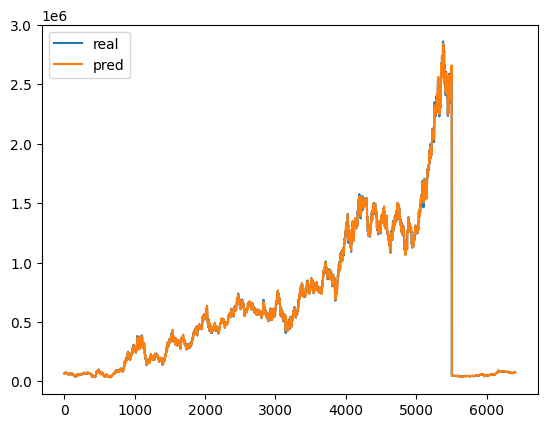

In [30]:
import matplotlib.pyplot as plt

plt.plot(train_target)
plt.plot(rf.predict(train_input))
plt.legend(['real','pred'])

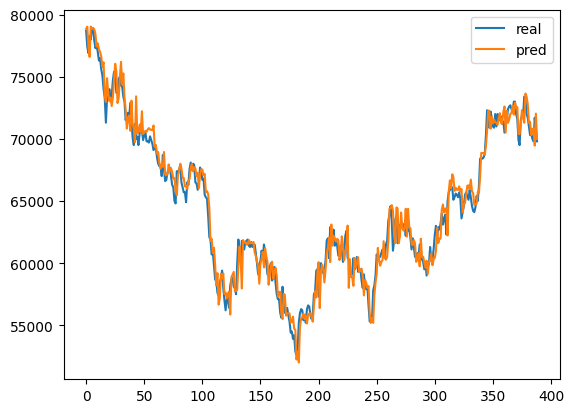

In [31]:
plt.plot(test_target)
plt.plot(rf.predict(test_input))
plt.legend(['real','pred'])

In [41]:
from sklearn.ensemble import RandomForestRegressor

samsung = pd.concat(total, ignore_index=True)
samsung = samsung.drop(0)

del samsung['전일비']

samsung['날짜'] = pd.to_datetime(samsung['날짜'])
samsung = samsung.set_index("날짜")
samsung = samsung.sort_index()

data = samsung.iloc[:-1].to_numpy()
target = samsung.iloc[1:, 0].to_numpy()

rf = RandomForestRegressor()
rf.fit(data,target)


RandomForestRegressor()

In [43]:
a = samsung.iloc[-1].to_numpy()
a

array([   69800.,    70900.,    71000.,    69800., 13035420.])

In [44]:
rf.predict([a])

array([69925.])

In [ ]:
#600만개 / 키움증권API, 재신증권API / 랜덤포레스트, k최근접
# 딥러닝: 56~ 65%
#랜덤포레스트 : 55~ 65%
#60%

In [52]:
df

,Pregnant,Plasma,Pressure,Thickness,Insulin,BMI,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


---

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pregnant   768 non-null    int64  
 1   Plasma     768 non-null    int64  
 2   Pressure   768 non-null    int64  
 3   Thickness  768 non-null    int64  
 4   Insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   Pedigree   768 non-null    float64
 7   Age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


ValueError: Found input variables with inconsistent numbers of samples: [576, 192]

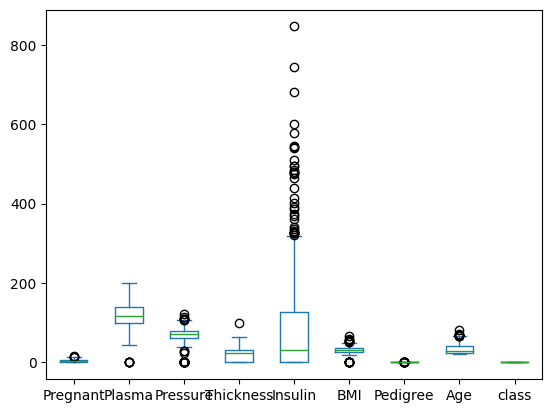

In [119]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/pima-indians-diabetes.csv', header=None)
df.columns = ['Pregnant', 'Plasma', 'Pressure', "Thickness", "Insulin", 'BMI','Pedigree','Age','class']
df

#문제집, 정답지 -> 데ㅣㅇ터분할 -> 데이터 표준화 -> 모델선택 -> 학습 -> 평가 -> 예측

#문제집, 정답지

df.plot.box() #이상치 확인 
del df['Insulin'] # 이상치 제거(주관적 판단)
data = df.iloc[:,:-1].to_numpy() #문제집
target = df['class'].to_numpy() #정답지

#데이터 분할
train_input, test_input, train_target, train_target = train_test_split(data,target)

#데이터 표준화
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

#모델 선택
for n in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(train_scaled, train_target)
  score = knn.score(test_scaled,test_target)
  print(n,score)


In [93]:
a = ([2, 100, 70, 30, 34, 0.6, 40] - mean) / std
knn.predict([a])


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [132]:
# 회귀모델 // count 값 예측하기 //r^2 값을 90% 이상으로 예측할 수 있는 모델
bike = pd.read_csv("data/bike.csv")

del bike['registered']
del bike['windspeed'] # lmplot을 그리면 바람이 0인것이 말이 안되므로 기계가 문제일 것

bike['datetime'] = pd.to_datetime(bike['datetime'])

bike['year'] = bike['datetime'].dt.year  #연도만 뽑아내기
bike['month'] = bike['datetime'].dt.month  #달만 뽑아내기
bike['day'] = bike['datetime'].dt.day  #날만 뽑아내기
bike['hour'] = bike['datetime'].dt.hour  #시간만 뽑아내기
bike['weekday'] = bike['datetime'].dt.weekday  #요일만 뽑아내기

del bike['datetime']  #뽑아낼 거 다 뽑아서 지우기

data = bike.loc[:, bike.columns != 'count'].to_numpy()
target = bike['count'].to_numpy()

rf = RandomForestRegressor(oob_score=True)
rf.fit(data,target)
rf.oob_score_

0.9714976517251261

c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


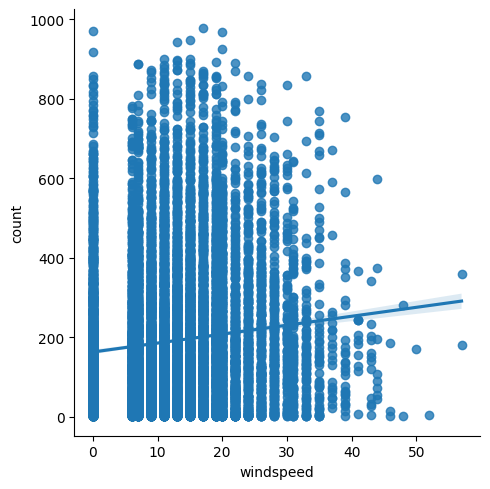

In [126]:
import seaborn as sns

sns.lmplot(data = bike,  x = 'windspeed', y = 'count')

<Axes: xlabel='hour', ylabel='count'>

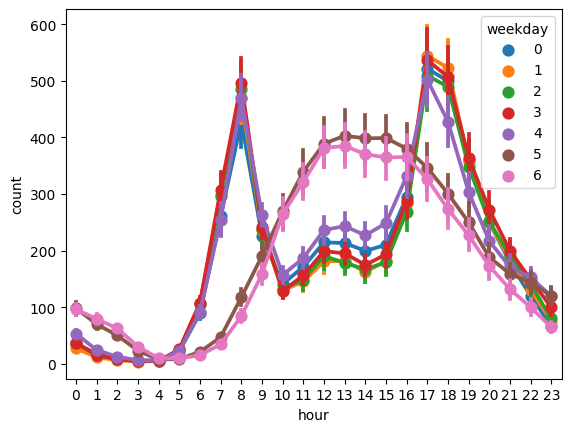

In [130]:
sns.pointplot(data = bike, x = 'hour', y = 'count', hue='weekday')

---

In [133]:
bike

,season,holiday,workingday,weather,temp,atemp,humidity,casual,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,3,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,8,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,5,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,3,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,7,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,10,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,4,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,12,129,2012,12,19,22,2


In [163]:
from tensorflow import keras
import pandas as pd

bike = pd.read_csv("data/bike.csv")

del bike['registered']
del bike['windspeed']

bike['datetime'] = pd.to_datetime(bike['datetime'])

bike['year'] = bike['datetime'].dt.year  #연도만 뽑아내기
bike['month'] = bike['datetime'].dt.month  #달만 뽑아내기
bike['day'] = bike['datetime'].dt.day  #날만 뽑아내기
bike['hour'] = bike['datetime'].dt.hour  #시간만 뽑아내기
bike['weekday'] = bike['datetime'].dt.weekday  #요일만 뽑아내기

del bike['datetime'] 

bike

,season,holiday,workingday,weather,temp,atemp,humidity,casual,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,3,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,8,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,5,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,3,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,7,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,10,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,4,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,12,129,2012,12,19,22,2


In [164]:
data = bike.loc[:, bike.columns != 'count'].to_numpy()
target = bike['count'].to_numpy()

In [165]:
data.shape, target.shape  #문제집(2차원 행렬), 정답지(1차원 행렬)

((10886, 13), (10886,))

In [ ]:
model.summary() #총 14개의 학습을 한다

In [192]:
import numpy as np

train_input, test_input, train_target, test_target = train_test_split(data, target)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

trian_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

In [194]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

model = keras.Sequential() # 인공신경망을 만드는 도화지
model.add(keras.layers.Dense(4, input_shape = (13,)))  #13개 입력층에서 1개의 출력층으로 간다
model.add(keras.layers.Dense(1))

model.compile(loss = 'mse', metrics = 'mae', optimizer='adam') # 기본값으로 경사하강법 사용하겠다


hist = model.fit(train_scaled, train_target, epochs = 200,
                 validation_data= (test_scaled, test_target))



ValueError: Data cardinality is ambiguous:
  x sizes: 576
  y sizes: 8164
Make sure all arrays contain the same number of samples.

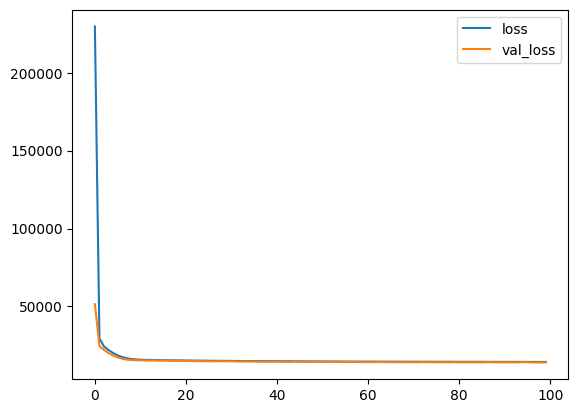

In [173]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])